#  Load and Preprocess Dataset

In [21]:
import cv2
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Define eye color labels
eye_colors = ['Blue', 'Brown', 'Gray', 'Green']
image_size = (128, 128)

# Load dataset
def load_images(data_path):
    images = []
    labels = []
    
    for label, color in enumerate(eye_colors):
        color_path = os.path.join(data_path, color)
        if not os.path.exists(color_path):
            continue
        
        for file in os.listdir(color_path):
            img_path = os.path.join(color_path, file)
            img = cv2.imread(img_path)
            if img is None:
                continue
            
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    
    return np.array(images), np.array(labels)
# Path to dataset
dataset_path = "./eye_images/train"
X, y = load_images(dataset_path)

# Normalize images
X = X / 255.0

# Split data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Dataset has been extracted and loaded successfully!")

Dataset has been extracted and loaded successfully!


# READ RANDOM IMAGES FROM DATASET

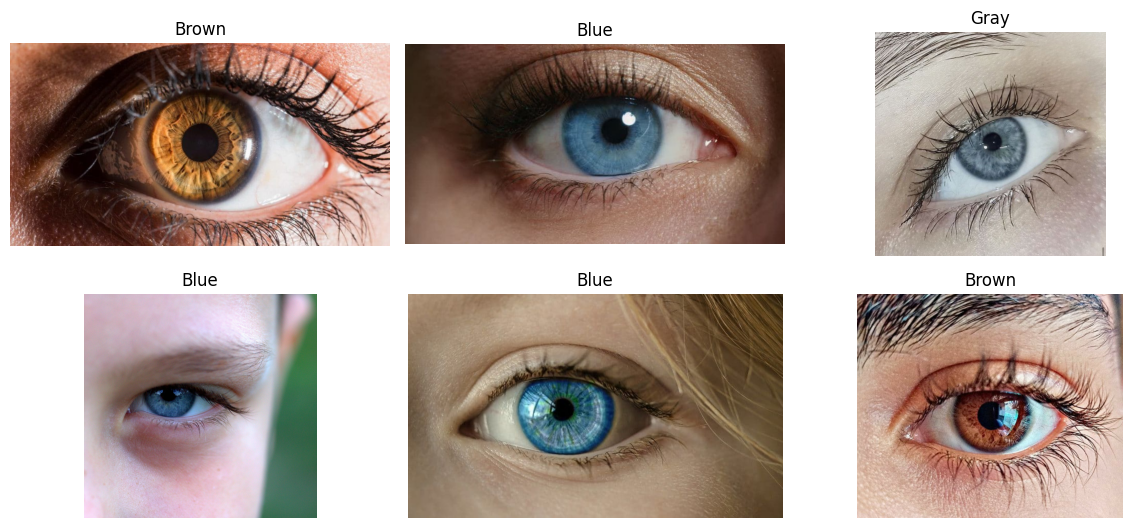

In [22]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_img(DATASET_PATH, num_images=6):
    image_paths = []
    labels = []

    # Walk through dataset directory and collect image paths and labels
    for root, dirs, files in os.walk(DATASET_PATH):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg', 'bmp')):
                full_path = os.path.join(root, file)
                label = os.path.basename(root)
                image_paths.append(full_path)
                labels.append(label)

    # Select random indices
    selected_indices = random.sample(range(len(image_paths)), min(num_images, len(image_paths)))

    # Plotting
    plt.figure(figsize=(12, 8))
    for i, idx in enumerate(selected_indices):
        img = mpimg.imread(image_paths[idx])
        plt.subplot(3, 3, i+1)
        plt.imshow(img)
        plt.title(labels[idx])
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Example usage
display_img(dataset_path, num_images=6)



# BAR PLOT

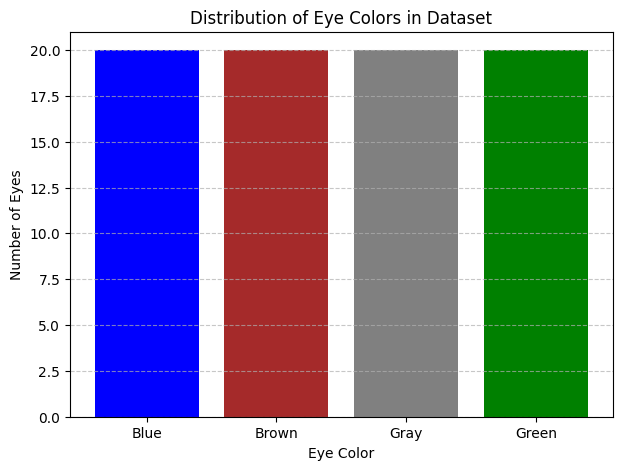

In [23]:
from collections import Counter

# Count the occurrences of each label
label_map_reverse = {0: "Blue", 1: "Brown", 2: "Gray", 3:"Green"}
label_counts = Counter(y)

# Extract labels and counts
labels = [label_map_reverse[key] for key in label_counts.keys()]
counts = list(label_counts.values())

# Plot the bar chart
plt.figure(figsize=(7, 5))
plt.bar(labels, counts, color=["blue", "Brown", "Gray","Green"])  # Set colors
plt.xlabel("Eye Color")
plt.ylabel("Number of Eyes")
plt.title("Distribution of Eye Colors in Dataset")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# DATA AUGMENTATION

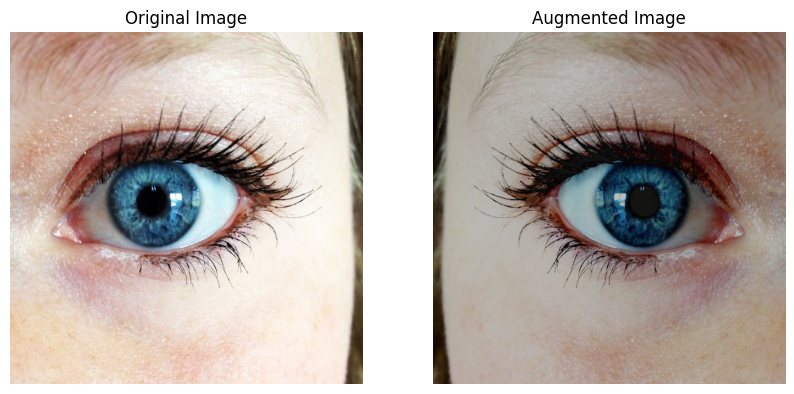

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

def random_brightness_contrast(img):
    alpha = 1.0 + random.uniform(-0.3, 0.3)  # Contrast control
    beta = random.randint(-30, 30)           # Brightness control
    img = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return img

def random_gamma(img):
    gamma = random.uniform(0.7, 1.5)
    inv_gamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** inv_gamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(img, table)

def coarse_dropout(img, max_holes=5, max_size=0.2):
    h, w, _ = img.shape
    img_copy = img.copy()
    for _ in range(random.randint(1, max_holes)):
        mask_h = int(random.uniform(0.05, max_size) * h)
        mask_w = int(random.uniform(0.05, max_size) * w)
        top = random.randint(0, h - mask_h)
        left = random.randint(0, w - mask_w)
        img_copy[top:top+mask_h, left:left+mask_w] = 0
    return img_copy

# Define custom augmentation function
def apply_custom_augmentations(img):
    if random.random() < 0.2:
        img = cv2.flip(img, 0)  # Vertical flip
    if random.random() < 0.7:
        img = cv2.flip(img, 1)  # Horizontal flip
    if random.random() < 0.5:
        img = coarse_dropout(img)
    if random.random() < 0.5:
        img = random_gamma(img)
    if random.random() < 1.0:
        img = random_brightness_contrast(img)
    return img

# Load the image
img_path = "./eye_images/train/blue/blue1.jpg"
img = cv2.imread(img_path)

# Check if image is loaded correctly
if img is None:
    print(f"Error: Could not load image at {img_path}")
else:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Apply custom augmentations
    augmented = apply_custom_augmentations(img)

    # Display images
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].imshow(img)
    axes[0].set_title("Original Image")
    axes[0].axis("off")

    axes[1].imshow(augmented)
    axes[1].set_title("Augmented Image")
    axes[1].axis("off")

    plt.show()


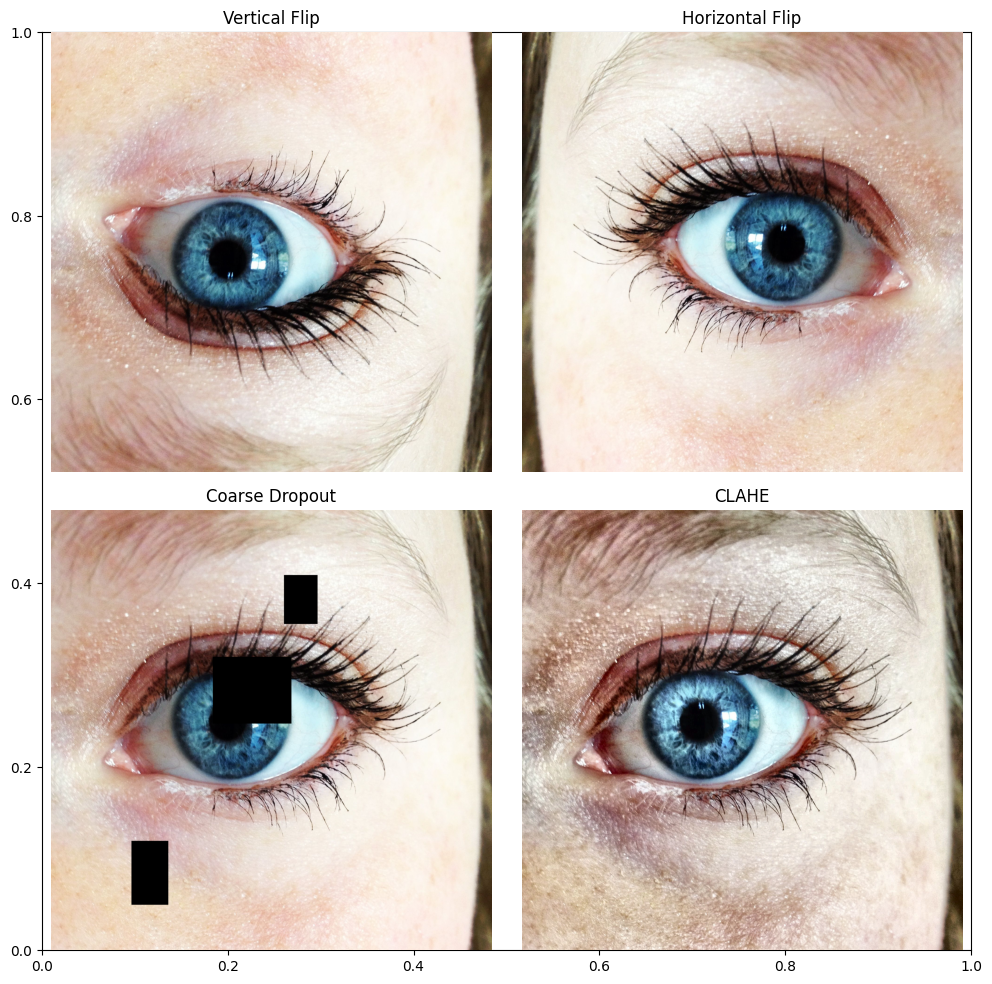

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Check if loaded
if img is None:
    print(f"Error loading image: {img_path}")
    exit()

# Convert BGR to RGB for display
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Augmentation functions
def vertical_flip(image):
    return cv2.flip(image, 0)

def horizontal_flip(image):
    return cv2.flip(image, 1)

def coarse_dropout(image, max_holes=5, max_size=0.2):
    h, w, _ = image.shape
    img_copy = image.copy()
    for _ in range(random.randint(1, max_holes)):
        mask_h = int(random.uniform(0.05, max_size) * h)
        mask_w = int(random.uniform(0.05, max_size) * w)
        top = random.randint(0, h - mask_h)
        left = random.randint(0, w - mask_w)
        img_copy[top:top+mask_h, left:left+mask_w] = 0
    return img_copy

def apply_clahe(image):
    lab = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)
    l, a, b = cv2.split(lab)

    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    merged = cv2.merge((cl, a, b))
    final = cv2.cvtColor(merged, cv2.COLOR_LAB2RGB)
    return final

# Define augmentations
augments = [
    ("Vertical Flip", vertical_flip),
    ("Horizontal Flip", horizontal_flip),
    ("Coarse Dropout", coarse_dropout),
    ("CLAHE", apply_clahe)
]

# Display all augmentations
plt.subplots(figsize=(10, 10))
for i, (name, aug_fn) in enumerate(augments):
    plt.subplot(2, 2, i + 1)
    aug_img = aug_fn(img)
    plt.imshow(aug_img)
    plt.title(name, fontsize=12)
    plt.axis("off")
plt.tight_layout()
plt.show()


# MODEL BUILDING(Transfer Learning & CNN)

In [45]:
#BUILDING INPUT PIPELINE
def aug_fn(img):
    aug_data = augmented(image=img)
    aug_img = aug_data['image']

    return aug_img

@tf.function
def process_data(img, label):
    aug_img = tf.numpy_function(aug_fn,
                                [img],
                                Tout=tf.float32)

    return img, label

def decode_image(dataset_path, label=None):

    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img,channels=3)
    img = tf.image.resize(img, [128, 128])
    img = tf.cast(img, tf.float32) / 255.0

    if label == None:
        return img

    return img, tf.one_hot(indices=label,
                           depth=120,
                           dtype=tf.float32)


In [46]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

# Parameters
img_size = (128, 128)
batch_size = 32

# Load datasets
train_ds = image_dataset_from_directory(
    "eye_images/train",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'  # one-hot encode labels
)

val_ds = image_dataset_from_directory(
    "eye_images/val",
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)


Found 80 files belonging to 4 classes.


Found 80 files belonging to 4 classes.


In [47]:
#LOAD PRE-TRAINED INCEPTION V3 MODEL
from tensorflow.keras.applications.inception_v3 import InceptionV3

pre_trained_model = InceptionV3(
    input_shape=(128, 128, 3),
    weights='imagenet',
    include_top=False
)

In [48]:
#INSPECT MODEL'S DEPTH
len(pre_trained_model.layers)

311

In [49]:
#FREEZE PRE-TRAINED LAYERSS
for layer in pre_trained_model.layers: 
  layer.trainable = False

last_layer = pre_trained_model.get_layer('mixed7') 
# Access the output shape from the output tensor of the layer
print('last layer output shape: ', last_layer.output.shape) 
last_output = last_layer.output

last layer output shape:  (None, 6, 6, 768)


In [50]:
#DEFINE CUSTOM MODEL ARCHITECTURE
# Model Architecture
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(4, activation='softmax')  # <-- must match number of classes
])

# Model Compilation
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [51]:
class myCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('accuracy') and logs['accuracy'] > 0.95:
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

es = EarlyStopping(
    patience=3,
    monitor='val_accuracy',
    restore_best_weights=True,
    mode='max'
)

lr = ReduceLROnPlateau(
    monitor='val_loss',
    patience=2,
    factor=0.5,
    verbose=1
)


In [52]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=50,
    verbose=1,
    callbacks=[es, lr, myCallback()]
)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 934ms/step - accuracy: 0.3250 - loss: 785.4035 - val_accuracy: 0.2500 - val_loss: 527.1278 - learning_rate: 0.0010
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 726ms/step - accuracy: 0.2656 - loss: 473.1959 - val_accuracy: 0.2500 - val_loss: 258.4333 - learning_rate: 0.0010
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 723ms/step - accuracy: 0.2336 - loss: 194.0517 - val_accuracy: 0.2500 - val_loss: 39.9990 - learning_rate: 0.0010
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 737ms/step - accuracy: 0.1945 - loss: 32.2157 - val_accuracy: 0.5125 - val_loss: 5.8824 - learning_rate: 0.0010
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 717ms/step - accuracy: 0.4711 - loss: 5.1314 - val_accuracy: 0.8625 - val_loss: 0.4329 - learning_rate: 0.0010
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 710ms/step - accuracy: 0.8992 - loss: 0.3006 - val_accuracy: 0.9625 - val_loss: 0.2393 - learning_rate: 0.0010
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 732ms/step - accuracy: 0.9195 - loss: 0.2625 - va

# SAVE THE MODEL

In [53]:
import pickle

# Save history
with open('history.pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history in a new session
with open('history.pkl', 'rb') as f:
    history_data = pickle.load(f)
    
model.save('my_model.keras') 


In [54]:
#LOADS THE SAVED MODEL
from tensorflow.keras.models import load_model

model = load_model('my_model.keras')

In [55]:
print(model.input_shape)

(None, 128, 128, 3)


In [56]:
# Assuming you're using tf.data.Dataset
test_loss, test_acc = model.evaluate(val_ds, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 211ms/step - accuracy: 0.9937 - loss: 0.0315
Test Accuracy: 0.9875
Test Loss: 0.0407


# EVALUATE THE MODEL

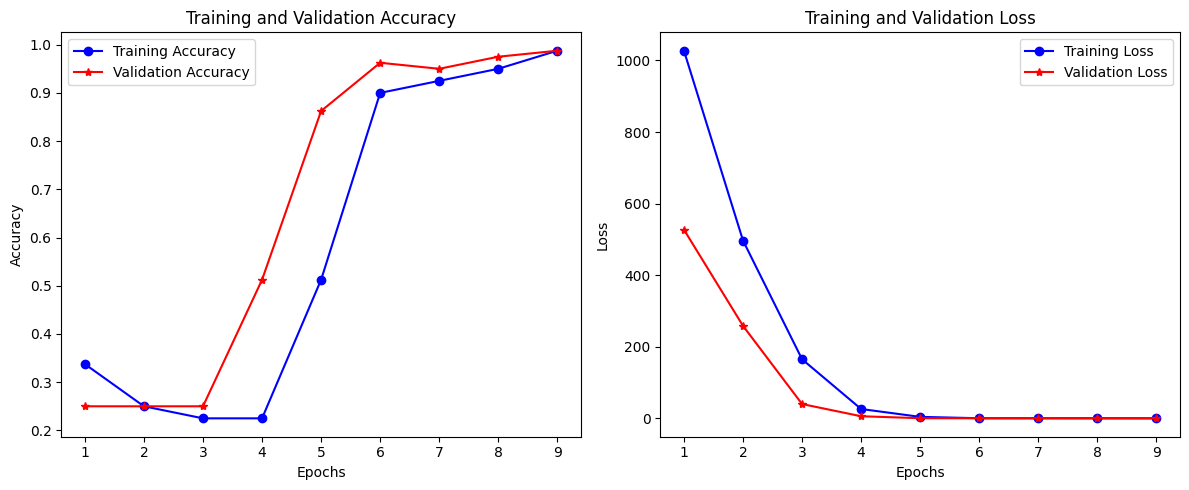

In [57]:
import matplotlib.pyplot as plt

# Assuming `history` is the output from model.fit()
# Replace `history` with your actual variable name if different
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r*-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'r*-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# TEST WITH NEW IMAGE

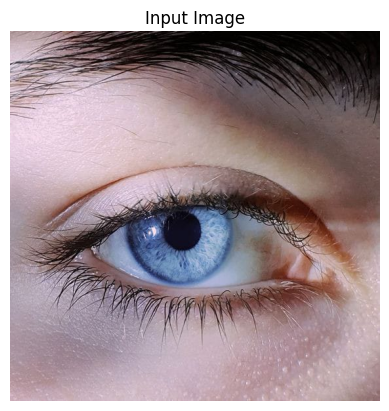

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
Predicted Eye Color: Blue


In [58]:
def predict_eye_color_from_array(img):
    img = cv2.resize(img, image_size)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    return eye_colors[predicted_class]

test_image = cv2.imread("./predicting_images/img5.jpeg")
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

plt.imshow(test_image)
plt.axis('off')
plt.title("Input Image")
plt.show()

predicted_color = predict_eye_color_from_array(test_image)
print("Predicted Eye Color:", predicted_color)


In [59]:
img = cv2.resize(test_image, image_size)
img = img / 255.0
img = np.expand_dims(img, axis=0)

prediction = model.predict(img)
color_classes = ['Blue', 'Brown', 'Gray', 'Green']
for i, prob in enumerate(prediction[0]):
    print(f"{color_classes[i]}: {prob:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
Blue: 0.25
Brown: 0.25
Gray: 0.25
Green: 0.25
